In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
general_data= pd.read_csv('general_data.csv')
manager_survey_data=pd.read_csv('manager_survey_data.csv')
employee_survey_data=pd.read_csv('employee_survey_data.csv')

in_time= pd.read_csv('in_time.csv')
out_time=pd.read_csv('out_time.csv')

data_dictionary=pd.read_excel('data_dictionary.xlsx')

In [3]:
data_dictionary

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [4]:
 in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,...,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,...,2015-11-06 10:15:27,NaN,NaN,NaN,2015-11-12 10:02:34,2015-11-13 09:29:49,2015-11-16 10:16:02,2015-11-17 09:57:23,2015-11-18 10:13:24,2015-11-19 09:46:48,2015-11-20 10:09:35,2015-11-23 09:54:17,2015-11-24 10:02:07,2015-11-25 10:01:51,2015-11-26 10:18:45,2015-11-27 10:24:49,2015-11-30 10:04:24,2015-12-01 09:31:27,2015-12-02 09:57:52,2015-12-03 10:05:55,2015-12-04 09:55:09,2015-12-07 09:28:15,2015-12-08 09:54:56,2015-12-09 09:51:52,2015-12-10 09:40:25,2015-12-11 09:46:49,2015-12-14 10:03:33,NaN,2015-12-16 10:21:19,NaN,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaN,2015-01-15 09:37:57,2015-01-16 09:57:18,2015-01-19 10:23:43,2015-01-20 09:29:03,2015-01-21 09:46:45,2015-01-22 10:03:51,2015-01-23 09:20:06,NaN,2015-01-27 10:07:48,2015-01-28 10:08:25,2015-01-29 09:52:04,2015-01-30 09:49:49,2015-02-02 10:07:26,2015-02-03 09:55:45,2015-02-04 10:25:41,2015-02-05 10:05:11,2015-02-06 09:12:39,NaN,2015-02-10 10:10:13,2015-02-11 09:40:20,2015-02-12 10:10:09,2015-02-13 09:35:25,2015-02-16 10:04:12,2015-02-17 09:45:05,2015-02-18 09:54:42,2015-02-19 10:11:49,2015-02-20 10:06:18,2015-02-23 09:41:58,2015-02-24 09:44:22,...,2015-11-06 10:02:38,NaN,NaN,NaN,2015-11-12 09:54:47,2015-11-13 09:26:10,2015-11-16 10:22:00,2015-11-17 09:26:04,2015-11-18 10:10:39,NaN,2015-11-20 10:01:09,2015-11-23 09:51:11,2015-11-24 09:19:04,2015-11-25 09:43:44,2015-11-26 10:34:30,2015-11-27 10:15:10,2015-11-30 09:46:46,2015-12-01 09:56:22,2015-12-02 09:55:43,2015-12-03 10:05:37,2015-12-04 10:02:05,2015-12-07 09:36:05,2015-12-08 10:01:21,2015-12-09 09:49:23,2015-12-10 10:06:05,2015-12-11 10:15:18,2015-12-14 10:00:01,2015-12-15 10:30:18,2015-12-16 10:01:18,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaN,2015-01-15 09:55:11,2015-01-16 10:05:36,2015-01-19 09:47:53,2015-01-20 09:57:09,2015-01-21 10:29:40,2015-01-22 09:59:11,2015-01-23 10:1

In [5]:
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,...,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,...,2015-11-06 17:15:12,NaN,NaN,NaN,2015-11-12 17:13:17,2015-11-13 16:49:27,2015-11-16 18:03:08,2015-11-17 17:03:06,2015-11-18 17:38:02,2015-11-19 16:46:27,2015-11-20 17:58:40,2015-11-23 17:13:22,2015-11-24 17:37:21,2015-11-25 17:26:51,2015-11-26 17:44:49,2015-11-27 17:30:02,2015-11-30 17:05:11,2015-12-01 16:53:21,2015-12-02 17:32:24,2015-12-03 17:40:59,2015-12-04 17:02:22,2015-12-07 16:21:37,2015-12-08 17:51:23,2015-12-09 17:48:46,2015-12-10 16:52:14,2015-12-11 17:25:56,2015-12-14 17:35:53,NaN,2015-12-16 17:54:26,NaN,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,NaN,2015-01-15 17:14:44,2015-01-16 17:40:57,2015-01-19 17:58:22,2015-01-20 17:05:13,2015-01-21 17:41:05,2015-01-22 17:26:26,2015-01-23 17:06:50,NaN,2015-01-27 17:35:50,2015-01-28 17:19:48,2015-01-29 17:07:38,2015-01-30 16:53:22,2015-02-02 17:45:18,2015-02-03 17:33:42,2015-02-04 18:04:20,2015-02-05 17:43:25,2015-02-06 17:06:42,NaN,2015-02-10 18:12:17,2015-02-11 17:18:36,2015-02-12 18:08:01,2015-02-13 17:19:25,2015-02-16 17:46:09,2015-02-17 17:09:30,2015-02-18 17:48:56,2015-02-19 18:06:35,2015-02-20 17:31:45,2015-02-23 17:57:18,2015-02-24 17:32:22,...,2015-11-06 17:28:38,NaN,NaN,NaN,2015-11-12 17:34:03,2015-11-13 17:38:25,2015-11-16 18:37:03,2015-11-17 17:26:09,2015-11-18 18:06:23,NaN,2015-11-20 17:52:48,2015-11-23 17:32:43,2015-11-24 17:01:00,2015-11-25 17:14:56,2015-11-26 18:28:44,2015-11-27 18:12:27,2015-11-30 17:18:40,2015-12-01 17:21:07,2015-12-02 18:02:46,2015-12-03 18:08:00,2015-12-04 18:01:03,2015-12-07 17:06:37,2015-12-08 17:44:18,2015-12-09 17:47:47,2015-12-10 17:55:23,2015-12-11 17:42:47,2015-12-14 17:32:11,2015-12-15 17:56:25,2015-12-16 18:16:37,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,NaN,2015-01-15 17:21:29,2015-01-16 17:18:13,2015-01-19 16:52:13,2015-01-20 16:52:23,2015-01-21 17:17:50,2015-01-22 17:27:54,2015-01-23 17:1

In [6]:
in_time.fillna(0,inplace=True)
out_time.fillna(0,inplace=True)

In [7]:
in_time.iloc[:,1:]=in_time.iloc[:,1:].apply(pd.to_datetime,errors='coerce')


In [8]:
out_time.iloc[:,1:]=out_time.iloc[:,1:].apply(pd.to_datetime,errors='coerce')

In [9]:
total_time= in_time.append(out_time)
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,...,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,1970-01-01,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,1970-01-01,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,...,2015-11-06 10:15:27,1970-01-01,1970-01-01,1970-01-01,2015-11-12 10:02:34,2015-11-13 09:29:49,2015-11-16 10:16:02,2015-11-17 09:57:23,2015-11-18 10:13:24,2015-11-19 09:46:48,2015-11-20 10:09:35,2015-11-23 09:54:17,2015-11-24 10:02:07,2015-11-25 10:01:51,2015-11-26 10:18:45,2015-11-27 10:24:49,2015-11-30 10:04:24,2015-12-01 09:31:27,2015-12-02 09:57:52,2015-12-03 10:05:55,2015-12-04 09:55:09,2015-12-07 09:28:15,2015-12-08 09:54:56,2015-12-09 09:51:52,2015-12-10 09:40:25,2015-12-11 09:46:49,2015-12-14 10:03:33,1970-01-01 00:00:00,2015-12-16 10:21:19,1970-01-01 00:00:00,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,1970-01-01,2015-01-15 09:37:57,2015-01-16 09:57:18,2015-01-19 10:23:43,2015-01-20 09:29:03,2015-01-21 09:46:45,2015-01-22 10:03:51,2015-01-23 09:20:06,1970-01-01,2015-01-27 10:07:48,2015-01-28 10:08:25,2015-01-29 09:52:04,2015-01-30 09:49:49,2015-02-02 10:07:26,2015-02-03 09:55:45,2015-02-04 10:25:41,2015-02-05 10:05:11,2015-02-06 09:12:39,1970-01-01 00:00:00,2015-02-10 10:10:13,2015-02-11 09:40:20,2015-02-12 10:10:09,2015-02-13 09:35:25,2015-02-16 10:04:12,2015-02-17 09:45:05,2015-02-18 09:54:42,2015-02-19 10:11:49,2015-02-20 10:06:18,2015-02-23 09:41:58,2015-02-24 09:44:22,...,2015-11-06 10:02:38,1970-01-01,1970-01-01,1970-01-01,2015-11-12 09:54:47,2015-11-13 09:26:10,2015-11-16 10:22:00,2015-11-17 09:26:04,2015-11-18 10:10:39,1970-01-01 00:00:00,2015-11-20 10:01:09,2015-11-23 09:51:11,2015-11-24 09:19:04,2015-11-25 09:43:44,2015-11-26 10:34:30,2015-11-27 10:15:10,2015-11-30 09:46:46,2015-12-01 09:56:22,2015-12-02 09:55:43,2015-12-03 10:05:37,2015-12-04 10:02:05,2015-12-07 09:36:05,2015-12-08 10:01:21,2015-12-09 09:49:23,2015-12-10 10:06:05,2015-12-11 10:15:18,2015-12-14 10:00:01,2015-12-15 10:30:18,2015-12-16 10:01:18,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06

In [10]:

total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,...,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,1970-01-01,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,1970-01-01,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,...,2015-11-06 10:15:27,1970-01-01,1970-01-01,1970-01-01,2015-11-12 10:02:34,2015-11-13 09:29:49,2015-11-16 10:16:02,2015-11-17 09:57:23,2015-11-18 10:13:24,2015-11-19 09:46:48,2015-11-20 10:09:35,2015-11-23 09:54:17,2015-11-24 10:02:07,2015-11-25 10:01:51,2015-11-26 10:18:45,2015-11-27 10:24:49,2015-11-30 10:04:24,2015-12-01 09:31:27,2015-12-02 09:57:52,2015-12-03 10:05:55,2015-12-04 09:55:09,2015-12-07 09:28:15,2015-12-08 09:54:56,2015-12-09 09:51:52,2015-12-10 09:40:25,2015-12-11 09:46:49,2015-12-14 10:03:33,1970-01-01 00:00:00,2015-12-16 10:21:19,1970-01-01 00:00:00,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,1970-01-01,2015-01-15 09:37:57,2015-01-16 09:57:18,2015-01-19 10:23:43,2015-01-20 09:29:03,2015-01-21 09:46:45,2015-01-22 10:03:51,2015-01-23 09:20:06,1970-01-01,2015-01-27 10:07:48,2015-01-28 10:08:25,2015-01-29 09:52:04,2015-01-30 09:49:49,2015-02-02 10:07:26,2015-02-03 09:55:45,2015-02-04 10:25:41,2015-02-05 10:05:11,2015-02-06 09:12:39,1970-01-01 00:00:00,2015-02-10 10:10:13,2015-02-11 09:40:20,2015-02-12 10:10:09,2015-02-13 09:35:25,2015-02-16 10:04:12,2015-02-17 09:45:05,2015-02-18 09:54:42,2015-02-19 10:11:49,2015-02-20 10:06:18,2015-02-23 09:41:58,2015-02-24 09:44:22,...,2015-11-06 10:02:38,1970-01-01,1970-01-01,1970-01-01,2015-11-12 09:54:47,2015-11-13 09:26:10,2015-11-16 10:22:00,2015-11-17 09:26:04,2015-11-18 10:10:39,1970-01-01 00:00:00,2015-11-20 10:01:09,2015-11-23 09:51:11,2015-11-24 09:19:04,2015-11-25 09:43:44,2015-11-26 10:34:30,2015-11-27 10:15:10,2015-11-30 09:46:46,2015-12-01 09:56:22,2015-12-02 09:55:43,2015-12-03 10:05:37,2015-12-04 10:02:05,2015-12-07 09:36:05,2015-12-08 10:01:21,2015-12-09 09:49:23,2015-12-10 10:06:05,2015-12-11 10:15:18,2015-12-14 10:00:01,2015-12-15 10:30:18,2015-12-16 10:01:18,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06

In [11]:
total_time=total_time.diff(periods=4410)
total_time=total_time.iloc[4410:]

In [12]:
total_time.reset_index(inplace=True)
total_time.head()

,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,...,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,...,0 days 06:59:45,0 days,0 days,0 days,0 days 07:10:43,0 days 07:19:38,0 days 07:47:06,0 days 07:05:43,0 days 07:24:38,0 days 06:59:39,0 days 07:49:05,0 days 07:19:05,0 days 07:35:14,0 days 07:25:00,0 days 07:26:04,0 days 07:05:13,0 days 07:00:47,0 days 07:21:54,0 days 07:34:32,0 days 07:35:04,0 days 07:07:13,0 days 06:53:22,0 days 07:56:27,0 days 07:56:54,0 days 07:11:49,0 days 07:39:07,0 days 07:32:20,0 days 00:00:00,0 days 07:33:07,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,1,0.0,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,0 days 07:36:47,0 days 07:43:39,0 days 07:34:39,0 days 07:36:10,0 days 07:54:20,0 days 07:22:35,0 days 07:46:44,0 days,0 days 07:28:02,0 days 07:11:23,0 days 07:15:34,0 days 07:03:33,0 days 07:37:52,0 days 07:37:57,0 days 07:38:39,0 days 07:38:14,0 days 07:54:03,0 days 00:00:00,0 days 08:02:04,0 days 07:38:16,0 days 07:57:52,0 days 07:44:00,0 days 07:41:57,0 days 07:24:25,0 days 07:54:14,0 days 07:54:46,0 days 07:25:27,0 days 08:15:20,...,0 days 07:26:00,0 days,0 days,0 days,0 days 07:39:16,0 days 08:12:15,0 days 08:15:03,0 days 08:00:05,0 days 07:55:44,0 days 00:00:00,0 days 07:51:39,0 days 07:41:32,0 days 07:41:56,0 days 07:31:12,0 days 07:54:14,0 days 07:57:17,0 days 07:31:54,0 days 07:24:45,0 days 08:07:03,0 days 08:02:23,0 days 07:58:58,0 days 07:30:32,0 days 07:42:57,0 days 07:58:24,0 days 07:49:18,0 days 07:27:29,0 days 07:32:10,0 days 07:26:07,0 days 08:15:19,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,2,0.0,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,0 days 07:26:18,0 days 07:12:37,0 days 07:04:20,0 days 06:55:14,0 days 06:48:10,0 days 07:28:43,0 days 06:55:18,0 days,0 days 07:14:57,0 days 06:18:21,0 days 07:13:19,0 days 07:01:27,0 days 07:04:16,0 days 06:31:13,0 days 07:21:51,0 days 06:21:30,0 days 06:54:24,0 days 06:39:35,0 days 06:49:31,0 days 06:47:09,0 days 06:27:21,0 days 07:08:41,0 days 07:01:22,0 days 06:41:07,0 days 07:02:49,0 days 06:57:37,0 days 06:53:11,0 days 07:45:17,...,0 days 06:33:20,0 days,0 days,0 days,0 days 07:21:57,0 days 06:59:45,0 days 06:48:07,0 days 07:17:35,0 days 07:16:09,0 days 06:11:54,

In [13]:
total_time.drop(columns=['index','Unnamed: 0'],inplace=True,axis=1)

In [14]:
total_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,...,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,...,0 days 06:59:45,0 days,0 days,0 days,0 days 07:10:43,0 days 07:19:38,0 days 07:47:06,0 days 07:05:43,0 days 07:24:38,0 days 06:59:39,0 days 07:49:05,0 days 07:19:05,0 days 07:35:14,0 days 07:25:00,0 days 07:26:04,0 days 07:05:13,0 days 07:00:47,0 days 07:21:54,0 days 07:34:32,0 days 07:35:04,0 days 07:07:13,0 days 06:53:22,0 days 07:56:27,0 days 07:56:54,0 days 07:11:49,0 days 07:39:07,0 days 07:32:20,0 days 00:00:00,0 days 07:33:07,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,0 days 07:36:47,0 days 07:43:39,0 days 07:34:39,0 days 07:36:10,0 days 07:54:20,0 days 07:22:35,0 days 07:46:44,0 days,0 days 07:28:02,0 days 07:11:23,0 days 07:15:34,0 days 07:03:33,0 days 07:37:52,0 days 07:37:57,0 days 07:38:39,0 days 07:38:14,0 days 07:54:03,0 days 00:00:00,0 days 08:02:04,0 days 07:38:16,0 days 07:57:52,0 days 07:44:00,0 days 07:41:57,0 days 07:24:25,0 days 07:54:14,0 days 07:54:46,0 days 07:25:27,0 days 08:15:20,0 days 07:48:00,0 days 07:45:08,...,0 days 07:26:00,0 days,0 days,0 days,0 days 07:39:16,0 days 08:12:15,0 days 08:15:03,0 days 08:00:05,0 days 07:55:44,0 days 00:00:00,0 days 07:51:39,0 days 07:41:32,0 days 07:41:56,0 days 07:31:12,0 days 07:54:14,0 days 07:57:17,0 days 07:31:54,0 days 07:24:45,0 days 08:07:03,0 days 08:02:23,0 days 07:58:58,0 days 07:30:32,0 days 07:42:57,0 days 07:58:24,0 days 07:49:18,0 days 07:27:29,0 days 07:32:10,0 days 07:26:07,0 days 08:15:19,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,0 days 07:26:18,0 days 07:12:37,0 days 07:04:20,0 days 06:55:14,0 days 06:48:10,0 days 07:28:43,0 days 06:55:18,0 days,0 days 07:14:57,0 days 06:18:21,0 days 07:13:19,0 days 07:01:27,0 days 07:04:16,0 days 06:31:13,0 days 07:21:51,0 days 06:21:30,0 days 06:54:24,0 days 06:39:35,0 days 06:49:31,0 days 06:47:09,0 days 06:27:21,0 days 07:08:41,0 days 07:01:22,0 days 06:41:07,0 days 07:02:49,0 days 06:57:37,0 days 06:53:11,0 days 07:45:17,0 days 06:45:06,0 days 06:56:25,...,0 days 06:33:20,0 days,0 days,0 days,0 days 07:21:

In [15]:
total_time=total_time.drop(columns=['2015-01-01','2015-01-14','2015-01-26','2015-11-09','2015-11-10','2015-11-11','2015-12-25'])

In [16]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,...,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,...,0 days 06:51:45,0 days 07:35:41,0 days 06:56:40,0 days 07:38:18,0 days 06:59:45,0 days 07:10:43,0 days 07:19:38,0 days 07:47:06,0 days 07:05:43,0 days 07:24:38,0 days 06:59:39,0 days 07:49:05,0 days 07:19:05,0 days 07:35:14,0 days 07:25:00,0 days 07:26:04,0 days 07:05:13,0 days 07:00:47,0 days 07:21:54,0 days 07:34:32,0 days 07:35:04,0 days 07:07:13,0 days 06:53:22,0 days 07:56:27,0 days 07:56:54,0 days 07:11:49,0 days 07:39:07,0 days 07:32:20,0 days 00:00:00,0 days 07:33:07,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,0 days 07:34:39,0 days 07:36:10,0 days 07:54:20,0 days 07:22:35,0 days 07:46:44,0 days 07:28:02,0 days 07:11:23,0 days 07:15:34,0 days 07:03:33,0 days 07:37:52,0 days 07:37:57,0 days 07:38:39,0 days 07:38:14,0 days 07:54:03,0 days 00:00:00,0 days 08:02:04,0 days 07:38:16,0 days 07:57:52,0 days 07:44:00,0 days 07:41:57,0 days 07:24:25,0 days 07:54:14,0 days 07:54:46,0 days 07:25:27,0 days 08:15:20,0 days 07:48:00,0 days 07:45:08,0 days 07:50:48,0 days 08:07:13,0 days 07:40:54,...,0 days 07:24:32,0 days 07:42:24,0 days 07:55:58,0 days 07:21:49,0 days 07:26:00,0 days 07:39:16,0 days 08:12:15,0 days 08:15:03,0 days 08:00:05,0 days 07:55:44,0 days 00:00:00,0 days 07:51:39,0 days 07:41:32,0 days 07:41:56,0 days 07:31:12,0 days 07:54:14,0 days 07:57:17,0 days 07:31:54,0 days 07:24:45,0 days 08:07:03,0 days 08:02:23,0 days 07:58:58,0 days 07:30:32,0 days 07:42:57,0 days 07:58:24,0 days 07:49:18,0 days 07:27:29,0 days 07:32:10,0 days 07:26:07,0 days 08:15:19,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,0 days 07:04:20,0 days 06:55:14,0 days 06:48:10,0 days 07:28:43,0 days 06:55:18,0 days 07:14:57,0 days 06:18:21,0 days 07:13:19,0 days 07:01:27,0 days 07:04:16,0 days 06:31:13,0 days 07:21:51,0 days 06:21:30,0 days 06:54:24,0 days 06:39:35,0 days 06:49:31,0 days 06:47:09,0 days 06:27:21,0 days 07:08:41,0 days 07:01:22,0 days 06:41:07,0 days 07:02:49,0 days 06:57:37,0 days 06:53:

In [17]:
total_time['mean_time']=total_time.mean(axis=1)
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,...,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,...,0 days 07:35:41,0 days 06:56:40,0 days 07:38:18,0 days 06:59:45,0 days 07:10:43,0 days 07:19:38,0 days 07:47:06,0 days 07:05:43,0 days 07:24:38,0 days 06:59:39,0 days 07:49:05,0 days 07:19:05,0 days 07:35:14,0 days 07:25:00,0 days 07:26:04,0 days 07:05:13,0 days 07:00:47,0 days 07:21:54,0 days 07:34:32,0 days 07:35:04,0 days 07:07:13,0 days 06:53:22,0 days 07:56:27,0 days 07:56:54,0 days 07:11:49,0 days 07:39:07,0 days 07:32:20,0 days 00:00:00,0 days 07:33:07,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,0 days 06:44:05.956692913
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,0 days 07:34:39,0 days 07:36:10,0 days 07:54:20,0 days 07:22:35,0 days 07:46:44,0 days 07:28:02,0 days 07:11:23,0 days 07:15:34,0 days 07:03:33,0 days 07:37:52,0 days 07:37:57,0 days 07:38:39,0 days 07:38:14,0 days 07:54:03,0 days 00:00:00,0 days 08:02:04,0 days 07:38:16,0 days 07:57:52,0 days 07:44:00,0 days 07:41:57,0 days 07:24:25,0 days 07:54:14,0 days 07:54:46,0 days 07:25:27,0 days 08:15:20,0 days 07:48:00,0 days 07:45:08,0 days 07:50:48,0 days 08:07:13,0 days 07:40:54,...,0 days 07:42:24,0 days 07:55:58,0 days 07:21:49,0 days 07:26:00,0 days 07:39:16,0 days 08:12:15,0 days 08:15:03,0 days 08:00:05,0 days 07:55:44,0 days 00:00:00,0 days 07:51:39,0 days 07:41:32,0 days 07:41:56,0 days 07:31:12,0 days 07:54:14,0 days 07:57:17,0 days 07:31:54,0 days 07:24:45,0 days 08:07:03,0 days 08:02:23,0 days 07:58:58,0 days 07:30:32,0 days 07:42:57,0 days 07:58:24,0 days 07:49:18,0 days 07:27:29,0 days 07:32:10,0 days 07:26:07,0 days 08:15:19,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,0 days 07:10:19.039370078
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,0 days 07:04:20,0 days 06:55:14,0 days 06:48:10,0 days 07:28:43,0 days 06:55:18,0 days 07:14:57,0 days 06:18:21,0 days 07:13:19,0 days 07:01:27,0 days 07:04:16,0 days 06:31:13,0 days 07:21:51,0 days 06:21:30,0 days 06:54:24,0 days 06:39:35,0 days 06:49:31,0 days 06:47:09,0 days 06:27:21,0 days 07:08:41,0 days 07:01:22,0 days 06:41:07,0 days 07:02:49,0 days 06:

In [18]:
total_time.iloc[0,0]

Timedelta('0 days 07:12:30')

In [19]:
total_time.mean_time = total_time.mean_time.apply(lambda x: int(str(x).split(' ')[2].split(':')[0])+ int(str(x).split(' ')[2].split(':')[1])/60+ float(str(x).split(' ')[2].split(':')[2])/3600)

In [20]:
total_time.reset_index(inplace=True)

In [21]:
total_time

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,...,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,...,0 days 07:35:41,0 days 06:56:40,0 days 07:38:18,0 days 06:59:45,0 days 07:10:43,0 days 07:19:38,0 days 07:47:06,0 days 07:05:43,0 days 07:24:38,0 days 06:59:39,0 days 07:49:05,0 days 07:19:05,0 days 07:35:14,0 days 07:25:00,0 days 07:26:04,0 days 07:05:13,0 days 07:00:47,0 days 07:21:54,0 days 07:34:32,0 days 07:35:04,0 days 07:07:13,0 days 06:53:22,0 days 07:56:27,0 days 07:56:54,0 days 07:11:49,0 days 07:39:07,0 days 07:32:20,0 days 00:00:00,0 days 07:33:07,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.734988
1,1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,0 days 07:34:39,0 days 07:36:10,0 days 07:54:20,0 days 07:22:35,0 days 07:46:44,0 days 07:28:02,0 days 07:11:23,0 days 07:15:34,0 days 07:03:33,0 days 07:37:52,0 days 07:37:57,0 days 07:38:39,0 days 07:38:14,0 days 07:54:03,0 days 00:00:00,0 days 08:02:04,0 days 07:38:16,0 days 07:57:52,0 days 07:44:00,0 days 07:41:57,0 days 07:24:25,0 days 07:54:14,0 days 07:54:46,0 days 07:25:27,0 days 08:15:20,0 days 07:48:00,0 days 07:45:08,0 days 07:50:48,0 days 08:07:13,...,0 days 07:42:24,0 days 07:55:58,0 days 07:21:49,0 days 07:26:00,0 days 07:39:16,0 days 08:12:15,0 days 08:15:03,0 days 08:00:05,0 days 07:55:44,0 days 00:00:00,0 days 07:51:39,0 days 07:41:32,0 days 07:41:56,0 days 07:31:12,0 days 07:54:14,0 days 07:57:17,0 days 07:31:54,0 days 07:24:45,0 days 08:07:03,0 days 08:02:23,0 days 07:58:58,0 days 07:30:32,0 days 07:42:57,0 days 07:58:24,0 days 07:49:18,0 days 07:27:29,0 days 07:32:10,0 days 07:26:07,0 days 08:15:19,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.171955
2,2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,0 days 07:04:20,0 days 06:55:14,0 days 06:48:10,0 days 07:28:43,0 days 06:55:18,0 days 07:14:57,0 days 06:18:21,0 days 07:13:19,0 days 07:01:27,0 days 07:04:16,0 days 06:31:13,0 days 07:21:51,0 days 06:21:30,0 days 06:54:24,0 days 06:39:35,0 days 06:49:31,0 days 06:47:09,0 days 06:27:21,0 days 07:08:41,0 days 07:01:22,0 days 06:41:07,0 days 07:02:49,0 days 06:57:37,0 days 06:53:11,0 days 07:45:17,0 days 06:45:06,0 days 06:5

In [22]:
total_time = total_time.rename(columns={'index':'EmployeeID'})

In [23]:
total_time=total_time[['EmployeeID','mean_time']]

In [24]:
total_time

,EmployeeID,mean_time
0,0,6.734988
1,1,7.171955
2,2,6.681906
3,3,6.655569
4,4,7.722491
...,...,...
4405,4405,8.153202
4406,4406,5.781110
4407,4407,7.008787
4408,4408,9.006753


In [25]:
df1 = pd.merge(general_data,manager_survey_data , on ='EmployeeID',how='inner')


In [26]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,2,3


In [27]:
df1 =pd.merge(df1,employee_survey_data,on= 'EmployeeID',how='inner')

In [28]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [29]:
df1= pd.merge(df1,total_time,on='EmployeeID',how='inner')
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,7.171955
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,6.681906
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.655569
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.722491
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,10.073523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5,2,3,3.0,4.0,3.0,8.153202
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,5.781110
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,7.008787
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,9.006753


In [30]:
df1.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4390.000000,4409.000000,4409.0,4409.000000,4401.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4384.000000,4389.000000,4372.000000,4409.000000
mean,36.923112,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.695444,15.210252,8.0,0.794058,11.279936,2.798594,7.004990,2.187571,4.122023,2.729644,3.153776,2.723996,2.728184,2.761436,7.170478
std,9.134220,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.498840,3.659203,0.0,0.851896,7.782222,1.288222,6.122203,3.222042,3.566975,0.711223,0.360775,1.092571,1.101371,0.706245,1.304704
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.310248
25%,30.000000,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.155393
50%,36.000000,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.873221
75%,43.000000,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.745401
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.721961


In [31]:
obj_cols= df1.select_dtypes(include=['object']).columns

In [32]:
obj_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [33]:
for i in obj_cols:
  unique_values=len(df1[i].value_counts())
  if unique_values==1:
    print(i)

Over18


In [34]:
df1.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [35]:
df1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            37
mean_time                   0
dtype: int64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeID               4409 non-null   int64  
 8   Gender                   4409 non-null   object 
 9   JobLevel                 4409 non-null   int64  
 10  JobRole                  4409 non-null   object 
 11  MaritalStatus            4409 non-null   object 
 12  MonthlyIncome            4409 non-null   int64  
 13  NumCompaniesWorked       4390 non-null   float64
 14  PercentSalaryHike       

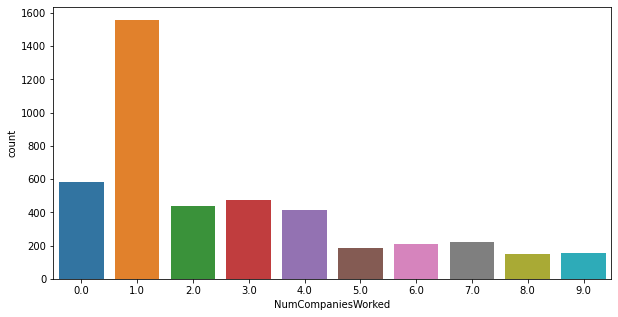

In [37]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='NumCompaniesWorked',data=df1)

In [38]:
df1['NumCompaniesWorked'].fillna(1.0,inplace=True)

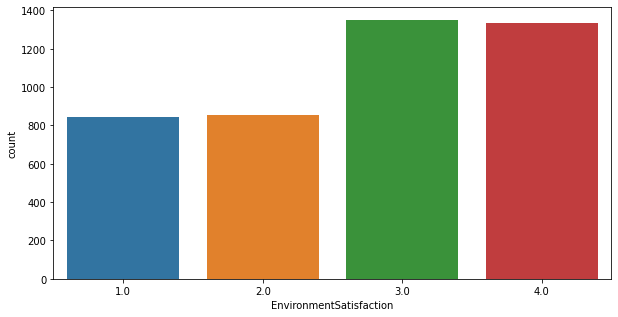

In [39]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='EnvironmentSatisfaction',data=df1)

In [40]:
df1['EnvironmentSatisfaction'].fillna(3.0,inplace=True)

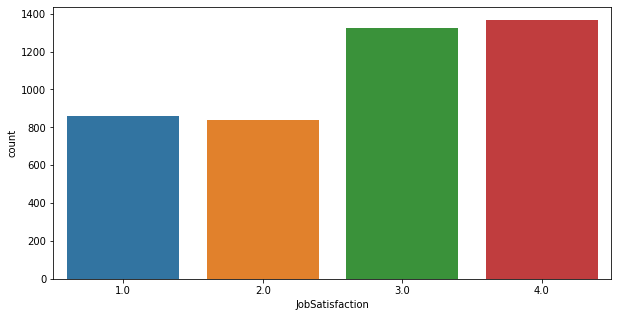

In [41]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='JobSatisfaction',data=df1)

In [42]:
df1['JobSatisfaction'].fillna(3.0,inplace=True)

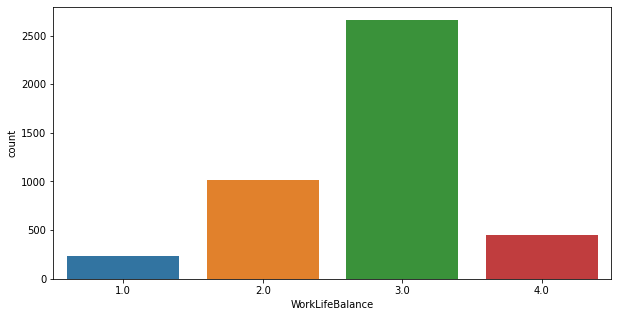

In [43]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='WorkLifeBalance',data=df1)

In [44]:
df1['WorkLifeBalance'].fillna(3.0,inplace=True)

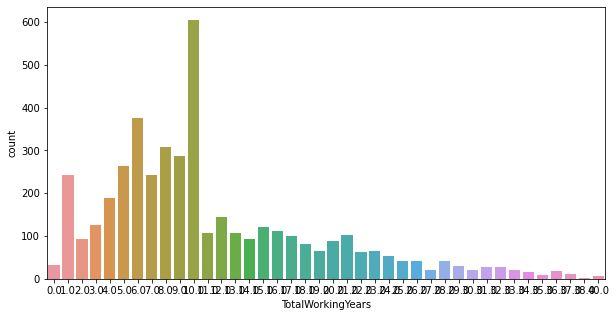

In [45]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='TotalWorkingYears',data=df1)

In [46]:
df1.TotalWorkingYears.median()

10.0

In [47]:
df1['TotalWorkingYears'].fillna(10.0,inplace=True)

In [48]:
df_eda=df1.copy()

In [49]:
df_eda.Age = pd.cut(df1.Age,range(10,70,10))

In [50]:
df_eda.Age

0       (50, 60]
1       (30, 40]
2       (30, 40]
3       (30, 40]
4       (30, 40]
          ...   
4404    (20, 30]
4405    (40, 50]
4406    (20, 30]
4407    (20, 30]
4408    (40, 50]
Name: Age, Length: 4409, dtype: category
Categories (5, interval[int64]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60]]

In [51]:
def make_plot(feature_name):
  plt.figure(figsize=(18,10))
  ax=sns.countplot(x=feature_name,hue='Attrition',data=df_eda,palette='Set2')
  plt.xlabel(feature_name)
  plt.ylabel('Attrition')
  plt.title('{} vs Attrition '.format(feature_name))
  plt.legend()


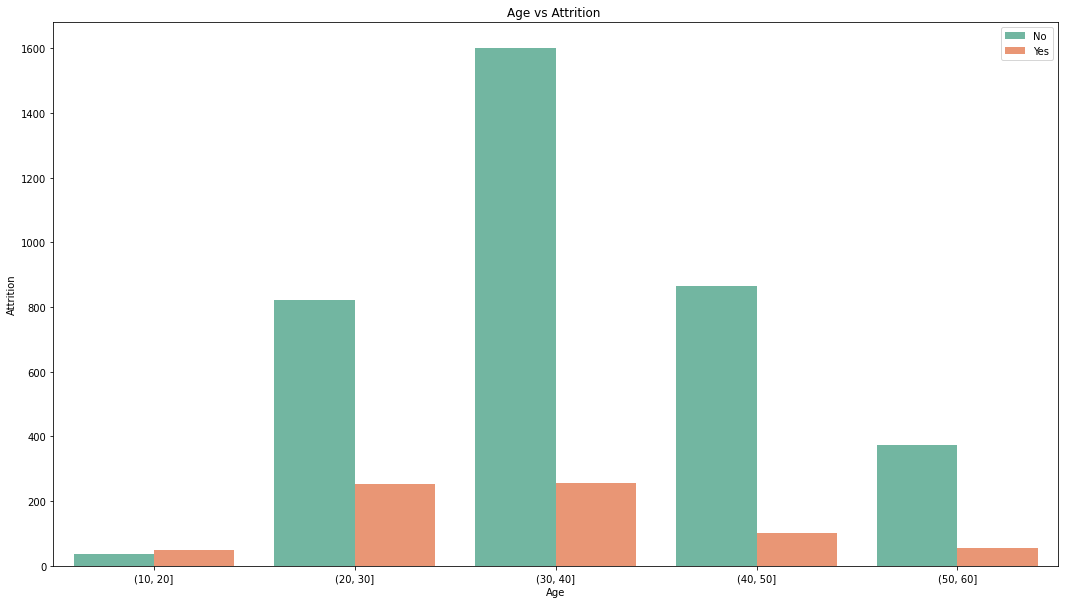

In [52]:
make_plot('Age')

with age atritution is decreasing
20-30 age group are leaving 
10-20

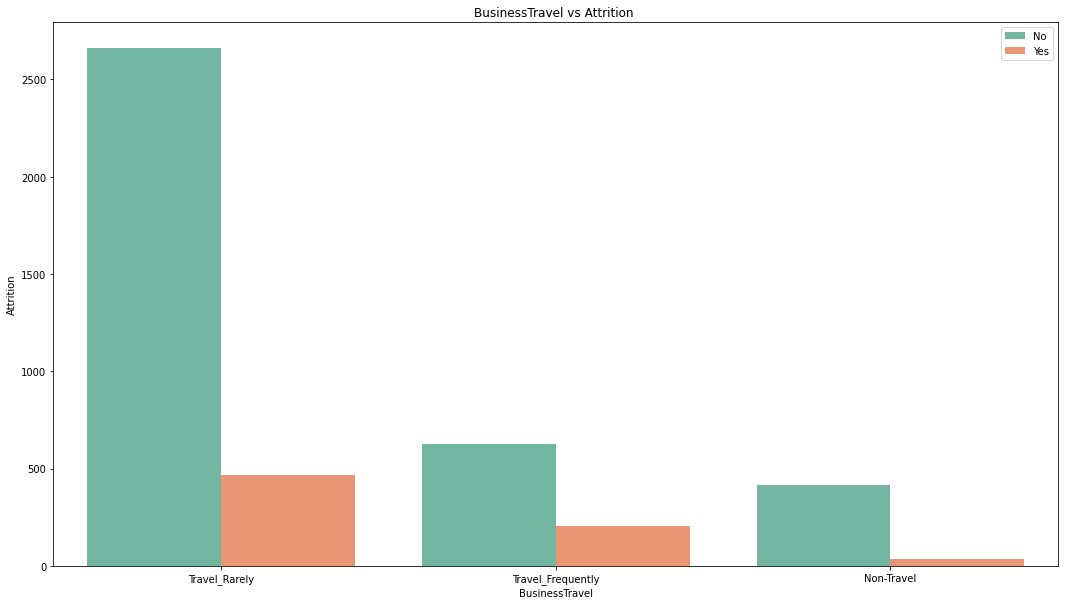

In [53]:
make_plot('BusinessTravel')

we can see that the people who are travelling more are tend to leave.

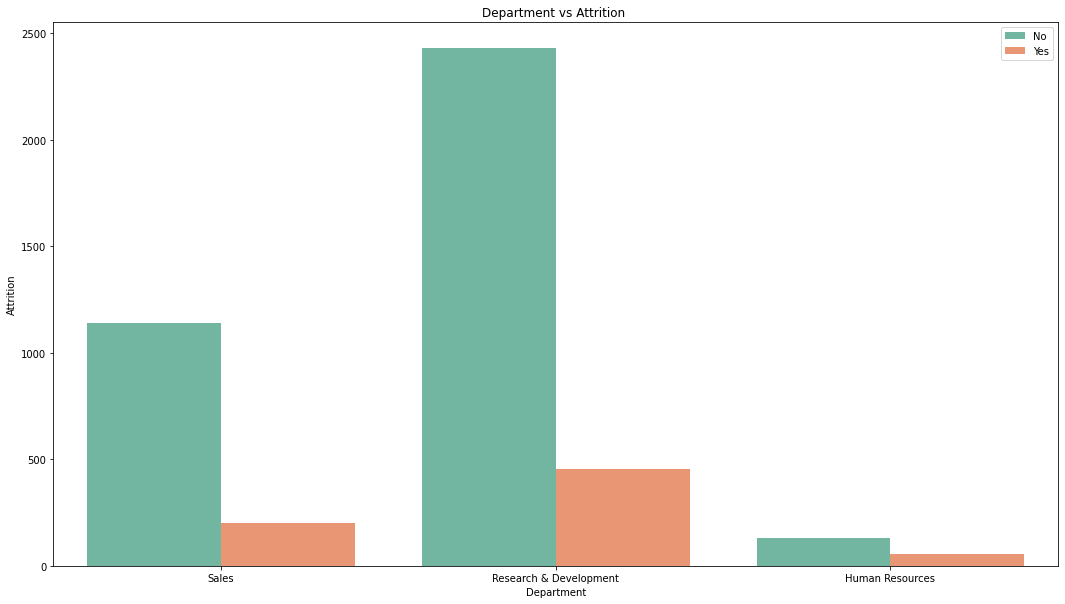

In [54]:
make_plot('Department')

hr have Attrition


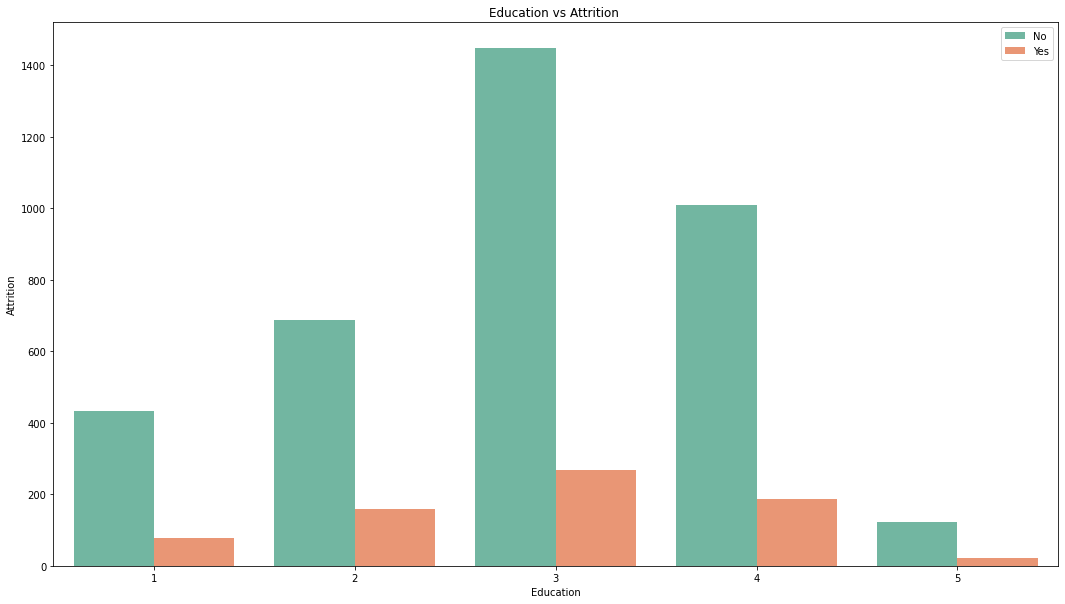

In [55]:
make_plot('Education')

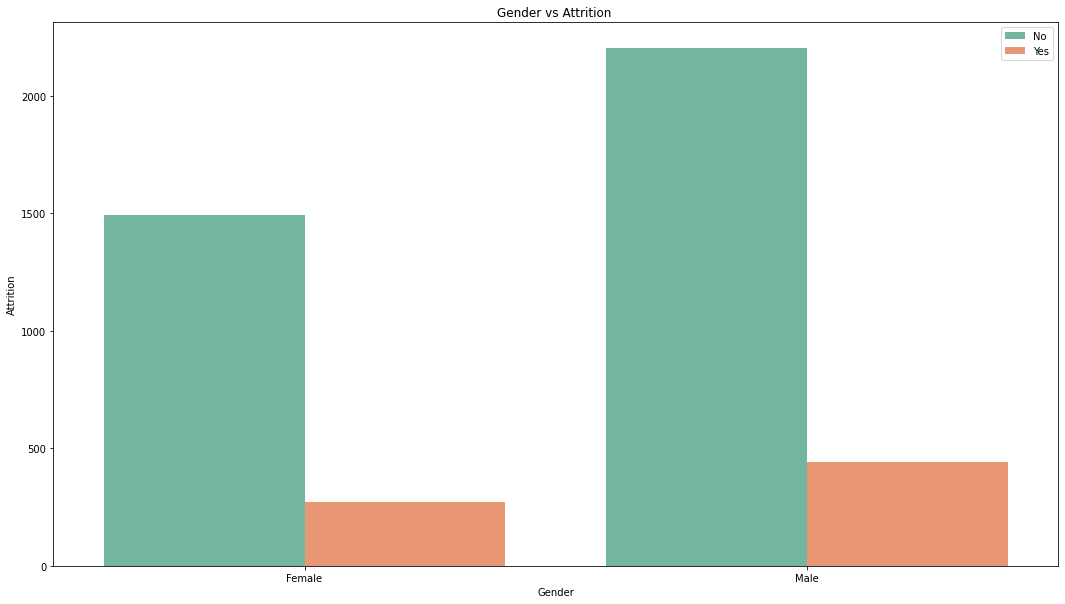

In [56]:
make_plot('Gender')

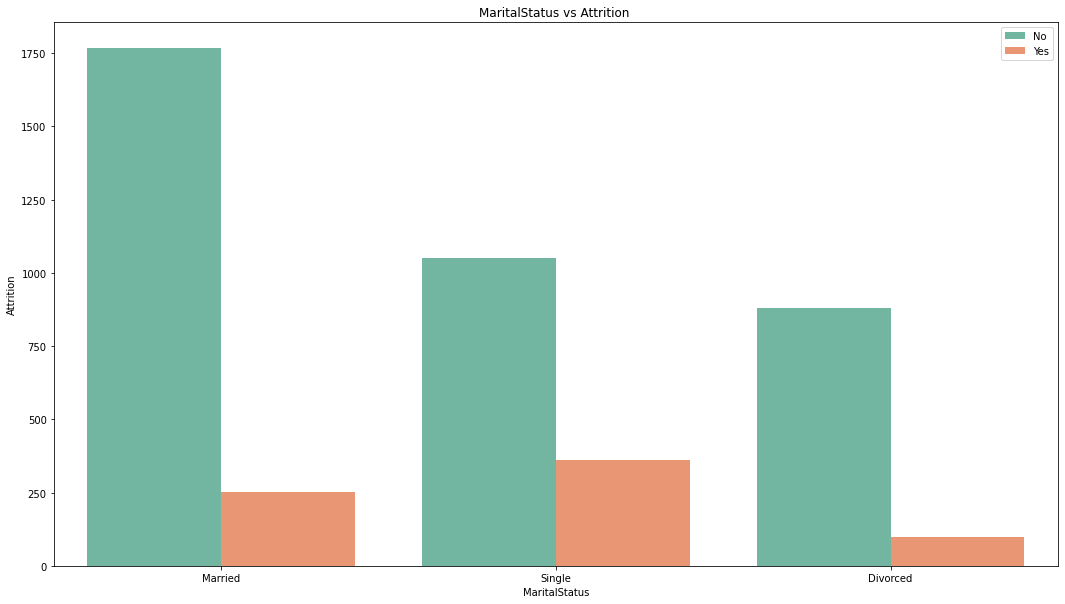

In [57]:
make_plot('MaritalStatus')

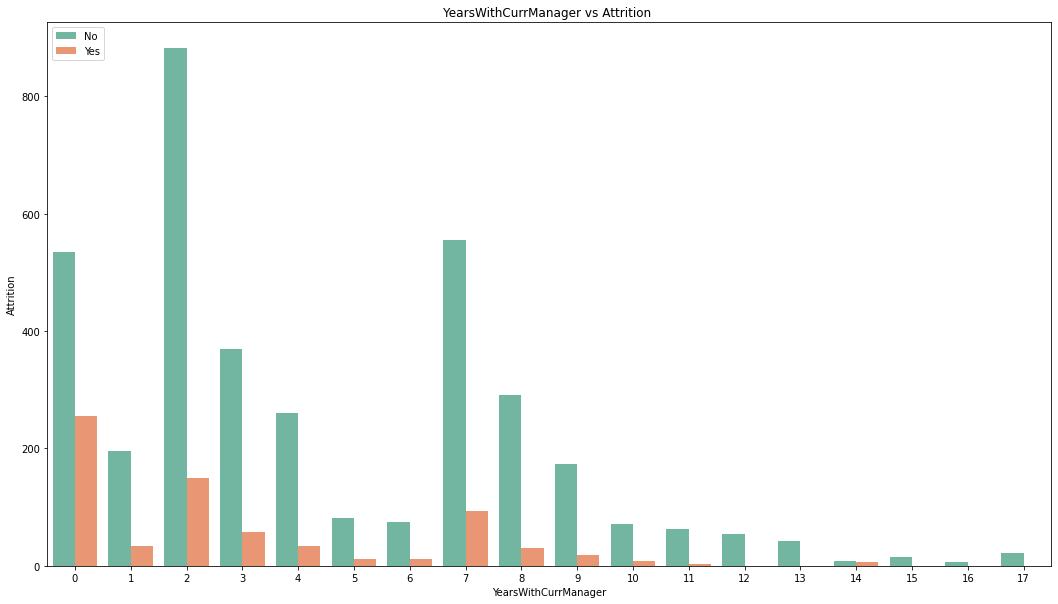

In [58]:
make_plot('YearsWithCurrManager')

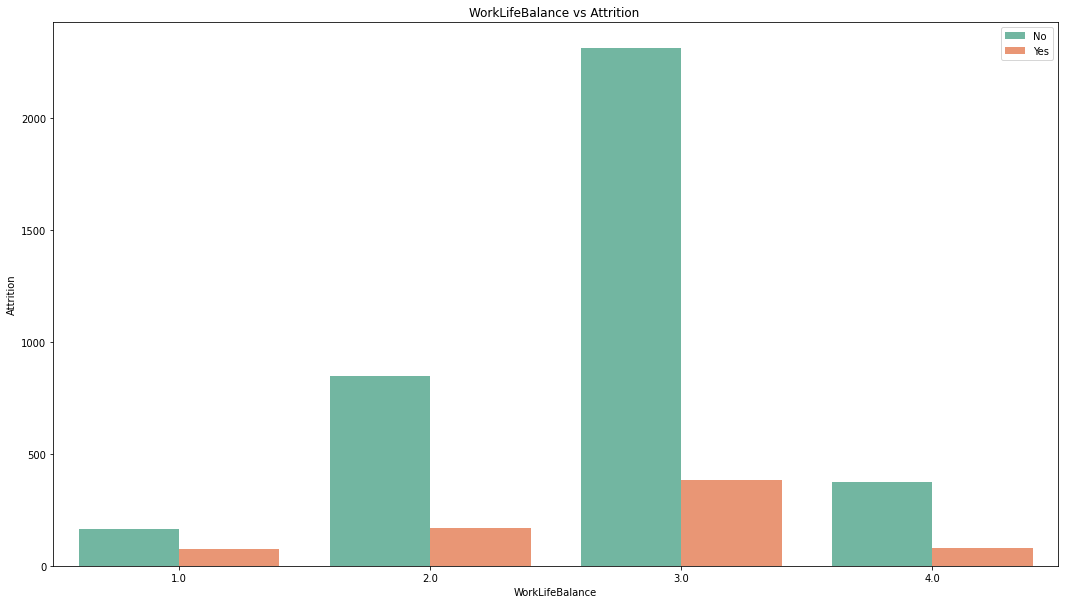

In [59]:
make_plot('WorkLifeBalance')

In [60]:
one_hot_var = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for i in one_hot_var:
  x_t=pd.get_dummies(df1[i] ,prefix=i,prefix_sep='_',drop_first=True)
  df1=df1.join(x_t)

  df1.drop(i,axis=1,inplace=True)

In [61]:
df1

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,6,2,1,Female,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,7.171955,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,Yes,10,1,2,Female,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,6.681906,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,No,17,4,3,Male,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.655569,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,38,No,2,5,4,Male,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.722491,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,No,10,1,5,Male,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,10.073523,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,4,3,4405,Female,2,35390,1.0,18,0,6.0,2,6,1,5,2,3,3.0,4.0,3.0,8.153202,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4405,42,No,5,4,4406,Female,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,5.781110,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4406,29,No,2,4,4407,Male,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,7.008787,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4407,25,No,25,2,4408,Male,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,9.006753,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [62]:
df1.Attrition =df1.Attrition.apply(lambda x: 1 if x=='Yes' else 0)
df1.Gender=df1.Gender.apply(lambda x: 1 if x=='Male' else 0 )
df1

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,0,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,7.171955,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,0,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,6.681906,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,3,1,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.655569,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,4,1,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.722491,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,5,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,10.073523,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,4,3,4405,0,2,35390,1.0,18,0,6.0,2,6,1,5,2,3,3.0,4.0,3.0,8.153202,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4405,42,0,5,4,4406,0,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,5.781110,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4406,29,0,2,4,4407,1,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,7.008787,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4407,25,0,25,2,4408,1,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,9.006753,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [63]:
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [64]:
from sklearn.model_selection import  train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [66]:
df_cor=x_train.copy()

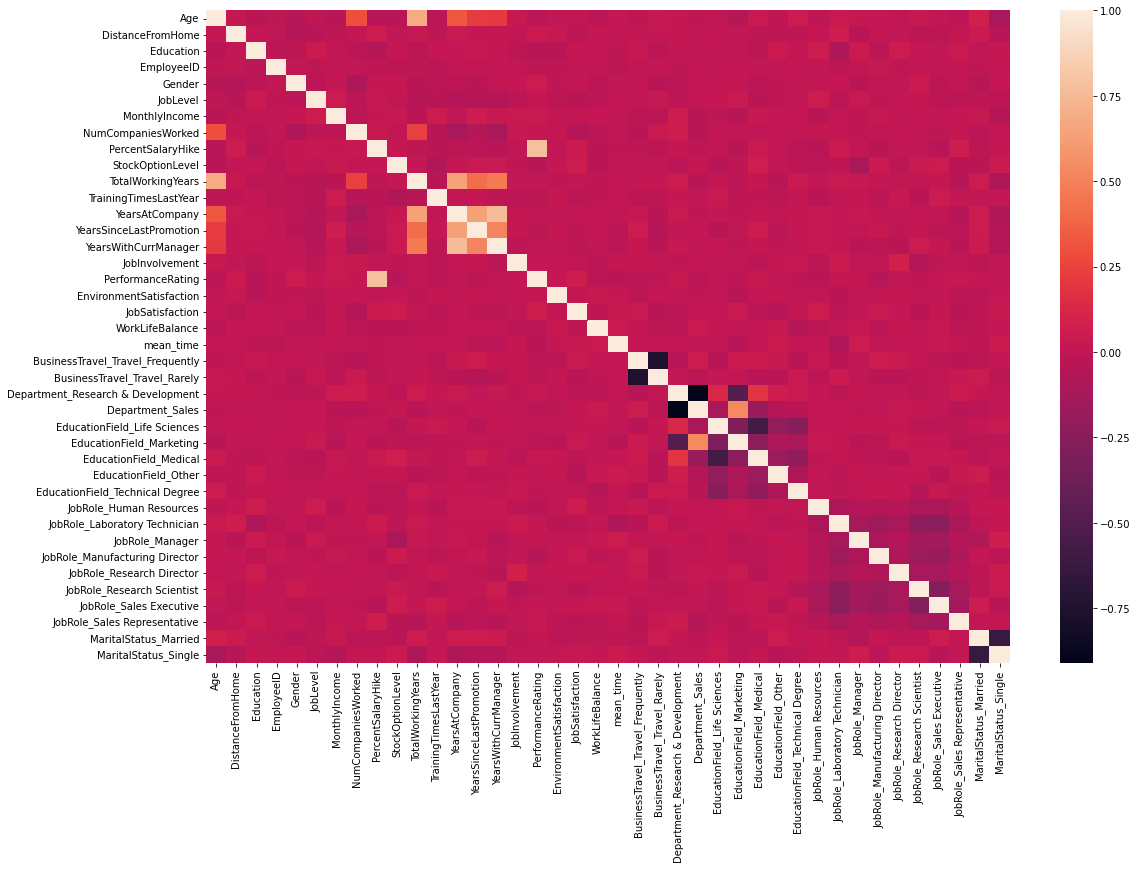

In [67]:
plt.figure(figsize=(18,12))
sns.heatmap(df_cor.corr())
plt.show()

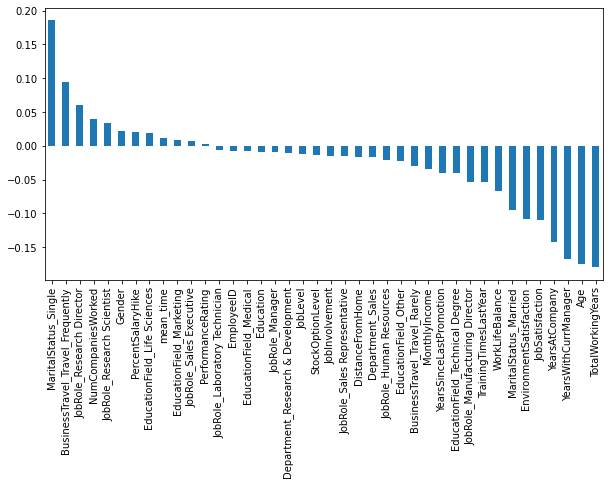

In [68]:
df_cor['Attrition'] =y_train
plt.figure(figsize=(10,5))
df_cor.corr()['Attrition'].sort_values(ascending=False)[1:].plot(kind='bar')

In [69]:
df_corr =df_cor.corr()
for i in range(df_corr.shape[0]):
  for j in range(df_corr.shape[1]):
    if(abs(df_corr.iloc[i,j])>0.8) & (abs(df_corr.iloc[i,j]) !=1):
      print(round(df_corr.iloc[i,j],3),df_corr.columns[j], '&',df_corr.index[i])

-0.91 Department_Sales & Department_Research & Development
-0.91 Department_Research & Development & Department_Sales


In [70]:
x_train.drop('Department_Sales',axis=1,inplace=True)
x_test.drop('Department_Sales',axis=1,inplace=True)

In [71]:
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [72]:

y.shape

(4409,)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [74]:
x_train.drop('Department_Sales',axis=1,inplace=True)
x_test.drop('Department_Sales',axis=1,inplace=True)

In [75]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3306 entries, 2402 to 860
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                3306 non-null   int64  
 1   DistanceFromHome                   3306 non-null   int64  
 2   Education                          3306 non-null   int64  
 3   EmployeeID                         3306 non-null   int64  
 4   Gender                             3306 non-null   int64  
 5   JobLevel                           3306 non-null   int64  
 6   MonthlyIncome                      3306 non-null   int64  
 7   NumCompaniesWorked                 3306 non-null   float64
 8   PercentSalaryHike                  3306 non-null   int64  
 9   StockOptionLevel                   3306 non-null   int64  
 10  TotalWorkingYears                  3306 non-null   float64
 11  TrainingTimesLastYear              3306 non-null   int

In [76]:
x_train['EnvironmentSatisfaction']=x_train['EnvironmentSatisfaction'].astype(int)

In [77]:
x_train['NumCompaniesWorked']=x_train['NumCompaniesWorked'].astype(int)
x_train['TotalWorkingYears']=x_train['TotalWorkingYears'].astype(int)
x_train['JobSatisfaction']=x_train['JobSatisfaction'].astype(int)
x_train['WorkLifeBalance']=x_train['WorkLifeBalance'].astype(int)

In [78]:
from sklearn.tree import DecisionTreeClassifier
m1= DecisionTreeClassifier()
m1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [80]:
y_pred=m1.predict(x_test)

In [83]:
precision_score(y_test,y_pred)

0.8834355828220859

In [82]:
accuracy_score(y_test,y_pred)

0.9673617407071623

In [84]:
recall_score(y_test,y_pred)

0.8944099378881988

In [85]:
f1_score(y_test,y_pred)

0.8888888888888888

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       942
           1       0.88      0.89      0.89       161

    accuracy                           0.97      1103
   macro avg       0.93      0.94      0.93      1103
weighted avg       0.97      0.97      0.97      1103

